# This notebook showcases the pipeline and results of various models predicting the the grade of approved lending club loans through a binary classification.
### The code describing the inital cleaning process of this data can be found in the 'CleaningLendingClub' jupyter notebook file.

In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Shows all columns at the same time.
pd.set_option('display.max_columns', None)

In [169]:
#Reading in cleaned data file that was created in the Cleaning Lending Club notebook.
LenClub = pd.read_csv(r"C:\Users\AH\MSAnalytics\Fall\DATA900\LendingClub\CleanLoan.csv")

In [170]:
#Examining column names.
print(LenClub.columns)
print('\n')
print('Number of columns in feature space:', len(LenClub.columns))

Index(['term', 'grade', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_cur_bal',
       'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'num_accts_ever_120_pd', 'num_actv_rev_tl', 'num_il_tl',
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'total_bc_limit', 'NewGrade'],
      dtype='object')


Number of columns in feature space: 39


In [171]:
#Changing NewGrade column to binary where AB = 1. This will be our y-response variable.
LenClub["NewGrade"] = np.where(np.isin(LenClub["NewGrade"], ["AB"]), 1 , 0)

In [172]:
LenClub.head()

,term,grade,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_rev_tl,num_il_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,NewGrade
0,60 months,C,RENT,86400.0,Not Verified,Mar-2014,debt_consolidation,NV,21.53,0.0,0.0,12.0,0.0,45.1,0.0,0.0,91651.0,52300.0,3.0,8332.0,26443.0,45.5,0.0,0.0,195.0,19.0,14.0,0.0,0.0,7.0,5.0,0.0,0.0,100.0,71.4,0.0,0.0,48500.0,0
1,36 months,B,MORTGAGE,100000.0,Not Verified,Mar-2014,debt_consolidation,WI,29.88,0.0,0.0,36.0,0.0,47.2,0.0,0.0,246496.0,125800.0,6.0,7043.0,26232.0,60.9,0.0,0.0,183.0,8.0,8.0,2.0,0.0,13.0,6.0,0.0,3.0,100.0,53.3,0.0,0.0,67100.0,1
2,60 months,G,RENT,60000.0,Verified,Mar-2014,moving,CA,20.78,0.0,3.0,11.0,1.0,22.8,0.0,0.0,22109.0,9100.0,7.0,2010.0,3335.0,32.2,0.0,0.0,208.0,1.0,1.0,0.0,0.0,7.0,17.0,0.0,3.0,100.0,0.0,1.0,0.0,5300.0,0
3,60 months,B,MORTGAGE,145000.0,Verified,Mar-2014,debt_consolidation,VA,9.36,0.0,2.0,10.0,0.0,32.7,0.0,0.0,437678.0,29700.0,5.0,48631.0,12366.0,41.7,0.0,0.0,271.0,4.0,4.0,2.0,0.0,4.0,6.0,0.0,4.0,95.5,33.3,0.0,0.0,21200.0,1
4,60 months,D,RENT,36000.0,Verified,Mar-2014,debt_consolidation,NJ,12.60,2.0,0.0,18.0,0.0,59.8,0.0,0.0,10136.0,16700.0,3.0,780.0,348.0,91.3,0.0,0.0,123.0,4.0,4.0,0.0,1.0,8.0,2.0,0.0,2.0,70.0,100.0,0.0,0.0,4000.0,0


In [173]:
#Looking at unique values amongst columns.
#This provides insight into possible further cleaning steps which can be performed.
for i in LenClub:
    print(i)
    print(LenClub[i].unique())

term
[' 60 months' ' 36 months' '36 months']
grade
['C' 'B' 'G' 'D' 'A' 'E' 'F']
home_ownership
['RENT' 'MORTGAGE' 'OWN' 'ANY']
annual_inc
[ 86400. 100000.  60000. ... 232224.  64521.  46203.]
verification_status
['Not Verified' 'Verified']
issue_d
['Mar-2014' 'Feb-2014' 'Jan-2014' 'Jun-2014' 'May-2014' 'Apr-2014'
 'Sep-2014' 'Aug-2014' 'Jul-2014' 'Sep-16' 'Aug-16' 'Jul-16' 'Dec-16'
 'Nov-16' 'Oct-16' 'Mar-17' 'Feb-17' 'Jan-17']
purpose
['debt_consolidation' 'moving' 'other' 'credit_card' 'car'
 'home_improvement' 'small_business' 'renewable_energy' 'major_purchase'
 'house' 'vacation' 'medical' 'wedding']
addr_state
['NV' 'WI' 'CA' 'VA' 'NJ' 'CO' 'AR' 'OH' 'FL' 'WA' 'DC' 'LA' 'NY' 'TX'
 'GA' 'IL' 'MD' 'SC' 'TN' 'MN' 'MI' 'CT' 'OK' 'AZ' 'PA' 'AL' 'IN' 'NC'
 'KY' 'NM' 'MA' 'HI' 'RI' 'WV' 'MO' 'MT' 'UT' 'VT' 'OR' 'AK' 'DE' 'NH'
 'WY' 'KS' 'SD' 'IA' 'ME' 'ID' 'MS' 'NE' 'ND']
dti
[2.153e+01 2.988e+01 2.078e+01 ... 2.000e-02 2.700e-01 1.000e-01]
delinq_2yrs
[ 0.  2.  1.  3.  4.  5.  7.  6. 

### Exploring features for feature creation/removal.
- Changed state column to region, less categories.
- Changed purpose to credit card, debt consolidation or other.
- Cleaning term column... there were 3 categories showing up because there was a space in front of some 36 columns.

#### Cleaning term column.
Issue within the column allowing 2 different categories for '36 months' term length.

In [174]:
LenClub['term'] = LenClub['term'].str.replace('60 months', '60')
LenClub['term'] = LenClub['term'].str.replace('36 months', '36')

LenClub['term'] = pd.to_numeric(LenClub['term'])
LenClub['term'] = LenClub['term'].astype('object')

#### Creation of region column.
Using a state column will create too many features during one-hot-encoding, giving them minimal predictive power. Condensing states into regions may have an effect on this.

In [175]:
#Creating US State dictionary.
#Also Dictionary of states to regions.

states = {"AL":"Alabama","AK":"Alaska","AZ":"Arizona","AR":"Arkansas","CA":"California","CO":"Colorado",
         "CT":"Connecticut","DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","ID":"Idaho",
         "IL":"Illinois","IN":"Indiana","IA":"Iowa","KS":"Kansas","KY":"Kentucky","LA":"Louisiana",
         "ME":"Maine","MD":"Maryland","MA":"Massachusetts","MI":"Michigan","MN":"Minnesota","MS":"Mississippi",
         "MO":"Missouri","MT":"Montana","NE":"Nebraska","NV":"Nevada","NH":"New Hampshire","NJ":"New Jersey",
         "NM":"New Mexico","NY":"New York","NC":"North Carolina","ND":"North Dakota","OH":"Ohio","OK":"Oklahoma",
         "OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota","TN":"Tennessee",
         "TX":"Texas","UT":"Utah","VT":"Vermont","VA":"Virginia","WA":"Washington","WV":"West Virginia","WI":"Wisconsin",
         "WY":"Wyoming", "DC":"DC"}


#Added DC to this because it is included as a state in our dataset.
states_to_regions = {'Washington': 'West', 'Oregon': 'West', 'California': 'West', 'Nevada': 'West',
                     'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Utah': 'West',
                     'Colorado': 'West', 'Alaska': 'West', 'Hawaii': 'West', 'Maine': 'Northeast',
                     'Vermont': 'Northeast', 'New York': 'Northeast', 'New Hampshire': 'Northeast',
                     'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',
                     'New Jersey': 'Northeast', 'Pennsylvania': 'Northeast', 'North Dakota': 'Midwest',
                     'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest',
                     'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest', 'Wisconsin': 'Midwest',
                     'Illinois': 'Midwest', 'Michigan': 'Midwest', 'Indiana': 'Midwest', 'Ohio': 'Midwest',
                     'West Virginia': 'South', 'District of Columbia': 'South', 'Maryland': 'South',
                     'Virginia': 'South', 'Kentucky': 'South', 'Tennessee': 'South', 'North Carolina': 'South',
                     'Mississippi': 'South', 'Arkansas': 'South', 'Louisiana': 'South', 'Alabama': 'South',
                     'Georgia': 'South', 'South Carolina': 'South', 'Florida': 'South', 'Delaware': 'South',
                     'Arizona': 'Southwest', 'New Mexico': 'Southwest', 'Oklahoma': 'Southwest',
                     'Texas': 'Southwest', 'DC': 'South'}

In [176]:
#Creating column representative of full state name by mapping above dictionary.
LenClub['StateName'] = LenClub['addr_state'].map(states)

#Creating region column by mapping created dictionary of regions above.
LenClub['Region'] = LenClub['StateName'].map(states_to_regions)

#Dropping addr_state and state name columns as they are not needed anymore.
LenClub = LenClub.drop(['addr_state', 'StateName'], axis = 1)
# LenClub = LenClub.drop(['PostIPO'], axis=1)


print(LenClub.shape)
LenClub.head()

(446725, 39)


,term,grade,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_rev_tl,num_il_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,NewGrade,Region
0,60,C,RENT,86400.0,Not Verified,Mar-2014,debt_consolidation,21.53,0.0,0.0,12.0,0.0,45.1,0.0,0.0,91651.0,52300.0,3.0,8332.0,26443.0,45.5,0.0,0.0,195.0,19.0,14.0,0.0,0.0,7.0,5.0,0.0,0.0,100.0,71.4,0.0,0.0,48500.0,0,West
1,36,B,MORTGAGE,100000.0,Not Verified,Mar-2014,debt_consolidation,29.88,0.0,0.0,36.0,0.0,47.2,0.0,0.0,246496.0,125800.0,6.0,7043.0,26232.0,60.9,0.0,0.0,183.0,8.0,8.0,2.0,0.0,13.0,6.0,0.0,3.0,100.0,53.3,0.0,0.0,67100.0,1,Midwest
2,60,G,RENT,60000.0,Verified,Mar-2014,moving,20.78,0.0,3.0,11.0,1.0,22.8,0.0,0.0,22109.0,9100.0,7.0,2010.0,3335.0,32.2,0.0,0.0,208.0,1.0,1.0,0.0,0.0,7.0,17.0,0.0,3.0,100.0,0.0,1.0,0.0,5300.0,0,West
3,60,B,MORTGAGE,145000.0,Verified,Mar-2014,debt_consolidation,9.36,0.0,2.0,10.0,0.0,32.7,0.0,0.0,437678.0,29700.0,5.0,48631.0,12366.0,41.7,0.0,0.0,271.0,4.0,4.0,2.0,0.0,4.0,6.0,0.0,4.0,95.5,33.3,0.0,0.0,21200.0,1,South
4,60,D,RENT,36000.0,Verified,Mar-2014,debt_consolidation,12.60,2.0,0.0,18.0,0.0,59.8,0.0,0.0,10136.0,16700.0,3.0,780.0,348.0,91.3,0.0,0.0,123.0,4.0,4.0,0.0,1.0,8.0,2.0,0.0,2.0,70.0,100.0,0.0,0.0,4000.0,0,Northeast


In [40]:
#Writing to csv for region column for visualization if desired.
# LenClub.to_csv("LenClubRegion.csv", index = False)

#### Changing purpose column to fewer categories.
There is an extreme number of values within this column, condensing them into 3 major categories.

In [177]:
purplist = []

for purp in LenClub['purpose']:
    if purp == "debt_consolidation":
        purplist.append(purp)
    elif purp == "credit_card":
        purplist.append(purp)
    else:
        purplist.append("other")
        
#Rewriting column with new list values.
LenClub['purpose'] = purplist

In [178]:
LenClub['purpose'].value_counts()

debt_consolidation    260406
credit_card            96817
other                  89502
Name: purpose, dtype: int64

#### Removing columns that don't meet the variance threshhold.

This section of the project was done in collaboration with another student. Code is currently not provided for this process. Source:

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold


20% variance threshold was selected, therefore any column who's values had less than 20% values are listed below to be removed.

In [179]:
#List of columns which were found to not meet the variance threshold.
LenClub = LenClub.drop(['collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
              'pub_rec_bankruptcies', 'pub_rec', 'num_tl_90g_dpd_24m', 'tax_liens'], axis=1)

LenClub = LenClub.drop(['issue_d'], axis=1)

#### Checking correlations of x features.
Features which are highly correlated will create redundancy within the models.

In [180]:
#Removing y response variable and creating x-feature space.
y = LenClub['NewGrade']

#Need to drop grade at this point, but will still be able to access it for further analysis in the LenClub dataframe.
X = LenClub.drop(['NewGrade', 'grade'], axis=1)

In [201]:
# #Larger correlation map if desired.
# corr = X.corr()
# corr.style.background_gradient()

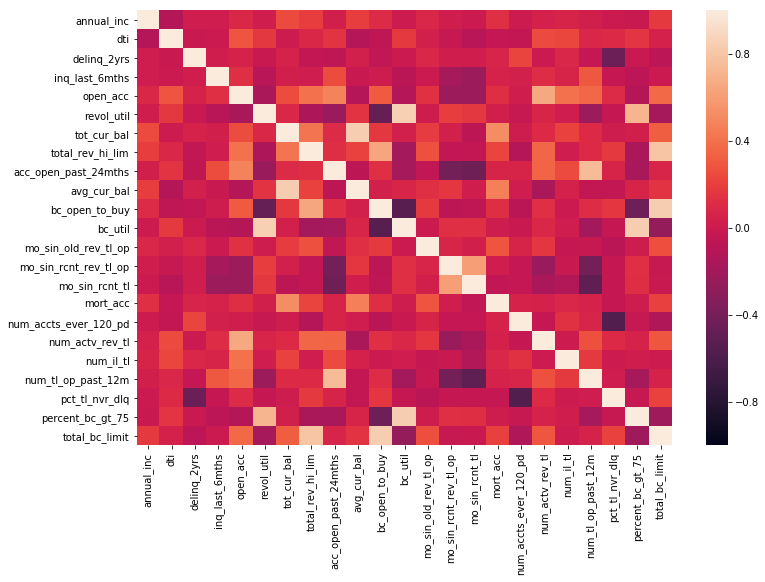

In [31]:
plt.figure(figsize = (12,8))
sns.heatmap(X.corr(), vmin=-1, vmax=1)

In [181]:
#Showcasing correlations that do not equal 1 and are above the threshhold of 0.65.
#There are no correlations less than -0.65, so we do not need to worry about that end.
corr_all=1
corr_val = 0.65
df2 = X.corr().unstack().reset_index()
df2 = df2[df2[0]!=corr_all]

df2[df2[0]>corr_val]

,level_0,level_1,0
109,open_acc,num_actv_rev_tl,0.661095
126,revol_util,bc_util,0.849151
136,revol_util,percent_bc_gt_75,0.717004
147,tot_cur_bal,avg_cur_bal,0.838815
183,total_rev_hi_lim,total_bc_limit,0.789978
203,acc_open_past_24mths,num_tl_op_past_12m,0.749596
213,avg_cur_bal,tot_cur_bal,0.838815
252,bc_open_to_buy,total_bc_limit,0.837249
258,bc_util,revol_util,0.849151
274,bc_util,percent_bc_gt_75,0.839094


In [182]:
##Testing dropping of some features with high correlation to others features to see if model improves.
#After this iterative process all of these columns were dropped.

X = X.drop('bc_util', axis=1)
X = X.drop('percent_bc_gt_75', axis=1)
X = X.drop('total_bc_limit', axis=1)
X = X.drop("num_accts_ever_120_pd", axis = 1)
X = X.drop("mo_sin_rcnt_rev_tl_op", axis = 1)
X = X.drop("tot_cur_bal", axis = 1)

In [183]:
print(X.shape)
X.head()

(446725, 22)


,term,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_util,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,mo_sin_old_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_actv_rev_tl,num_il_tl,num_tl_op_past_12m,pct_tl_nvr_dlq,Region
0,60,RENT,86400.0,Not Verified,debt_consolidation,21.53,0.0,0.0,12.0,45.1,52300.0,3.0,8332.0,26443.0,195.0,14.0,0.0,7.0,5.0,0.0,100.0,West
1,36,MORTGAGE,100000.0,Not Verified,debt_consolidation,29.88,0.0,0.0,36.0,47.2,125800.0,6.0,7043.0,26232.0,183.0,8.0,2.0,13.0,6.0,3.0,100.0,Midwest
2,60,RENT,60000.0,Verified,other,20.78,0.0,3.0,11.0,22.8,9100.0,7.0,2010.0,3335.0,208.0,1.0,0.0,7.0,17.0,3.0,100.0,West
3,60,MORTGAGE,145000.0,Verified,debt_consolidation,9.36,0.0,2.0,10.0,32.7,29700.0,5.0,48631.0,12366.0,271.0,4.0,2.0,4.0,6.0,4.0,95.5,South
4,60,RENT,36000.0,Verified,debt_consolidation,12.60,2.0,0.0,18.0,59.8,16700.0,3.0,780.0,348.0,123.0,4.0,0.0,8.0,2.0,2.0,70.0,Northeast


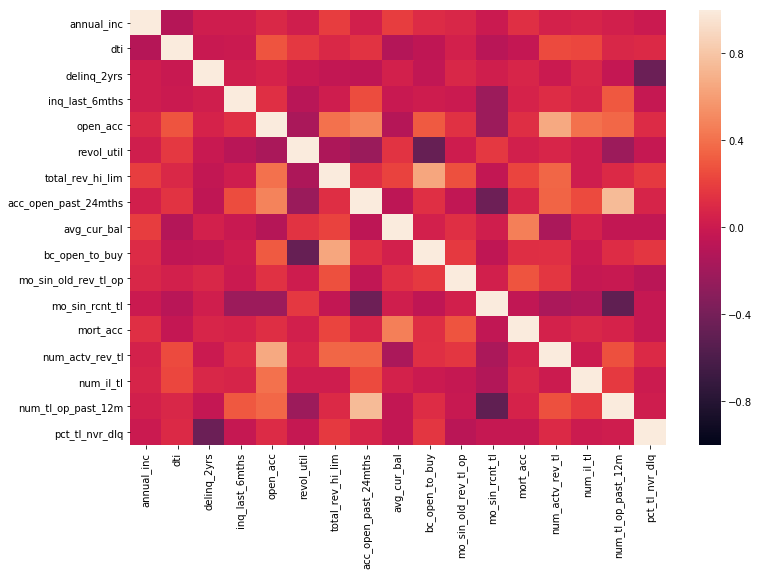

In [35]:
#Final correlation map before modeling process begins.
plt.figure(figsize = (12,8))
sns.heatmap(X.corr(), vmin=-1, vmax=1)

In [184]:
#Need to separate variables into continuous and categorical for scaling of continuous data and onehotencoding of categorical.

#Continuous column names.
cont = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

#Categorical column names.
cat = X.select_dtypes(include=['object']).columns.tolist()

# Splitting data into test/train sets.
This must happen before moving further with the model creation.

In [228]:
from sklearn.model_selection import train_test_split

#Splitting data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [229]:
print(X_train.shape)
X_train.head()

(357380, 22)


,term,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_util,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,mo_sin_old_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_actv_rev_tl,num_il_tl,num_tl_op_past_12m,pct_tl_nvr_dlq,Region
112586,60,RENT,67000.0,Verified,other,13.38,0.0,1.0,9.0,81.0,6400.0,4.0,1720.0,782.0,94.0,9.0,0.0,5.0,10.0,2.0,76.5,Midwest
396887,36,MORTGAGE,70000.0,Verified,other,20.50,0.0,0.0,13.0,49.9,25800.0,3.0,15599.0,12913.0,65.0,8.0,1.0,3.0,11.0,1.0,100.0,Northeast
362572,36,RENT,102195.0,Not Verified,debt_consolidation,22.97,0.0,0.0,21.0,70.8,64600.0,1.0,5779.0,1604.0,417.0,24.0,0.0,10.0,19.0,0.0,74.3,South
68326,36,MORTGAGE,80000.0,Verified,other,20.99,0.0,1.0,14.0,31.9,32900.0,4.0,3176.0,8038.0,127.0,4.0,2.0,11.0,2.0,3.0,100.0,West
302336,36,RENT,91200.0,Verified,other,3.03,0.0,0.0,2.0,103.4,500.0,1.0,1363.0,0.0,149.0,22.0,0.0,1.0,10.0,0.0,100.0,South


# Scaling the Data.
Standard scaler is to be used on continuous data.

Scaling the data will be performed before using one-hot-ecoding.
This ensures that all data will be on same scale and will not be skewed due to different metrics.

In [230]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [231]:
#Scaling continuous data types of data set in the training data.
X_train[cont] = scaler.fit_transform(X_train[cont])


#Applying this scaler to the test data.
X_test[cont] = scaler.transform(X_test[cont])

C:\Users\AH\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\AH\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\AH\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde

In [232]:
print(X_train.shape)

#Keeping list of indexes of xtrain and xtest for later use so they don't get lost.
X_trainINDEX = X_train.index.values.tolist()
X_testINDEX = X_test.index.values.tolist()

X_train.head()

(357380, 22)


,term,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_util,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,mo_sin_old_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_actv_rev_tl,num_il_tl,num_tl_op_past_12m,pct_tl_nvr_dlq,Region
112586,60,RENT,-0.097840,Verified,other,-0.584765,-0.380582,0.365651,-0.498114,1.219179,-0.805766,-0.193230,-0.735958,-0.616148,-0.934639,0.118557,-0.827283,-0.226989,0.197205,-0.053095,-1.875940,Midwest
396887,36,MORTGAGE,-0.073843,Verified,other,0.320669,-0.380582,-0.683048,0.221878,-0.091081,-0.207814,-0.514137,0.138275,0.196220,-1.236882,0.003177,-0.318174,-0.831092,0.333026,-0.614155,0.681785,Northeast
362572,36,RENT,0.183686,Not Verified,debt_consolidation,0.634773,-0.380582,-0.683048,1.661863,0.789447,0.988091,-1.155950,-0.480283,-0.561102,2.431717,1.849271,-0.827283,1.283268,1.419598,-1.175215,-2.115387,South
68326,36,MORTGAGE,0.006148,Verified,other,0.382981,-0.380582,0.365651,0.401876,-0.849431,0.011024,-0.193230,-0.644245,-0.130240,-0.590708,-0.458347,0.190935,1.585319,-0.889367,0.507965,0.681785,West
302336,36,RENT,0.095737,Verified,other,-1.900950,-0.380582,-0.683048,-1.758101,2.162903,-0.987617,-1.155950,-0.758445,-0.668515,-0.361421,1.618509,-0.827283,-1.435195,0.197205,-1.175215,0.681785,South


### One-hot-encoding of categorical data.

Using LabelEncoder and OneHotEncoder from sklearn. pd.get_dummies is another option if desired.

In [233]:
#Listing categorical data type columns.
print(cat)

['term', 'home_ownership', 'verification_status', 'purpose', 'Region']


In [234]:
#Need to use label encoder on categorical data before onehotencoder can be used.
from sklearn.preprocessing import LabelEncoder

In [235]:
le = LabelEncoder()

labellist = []

for i in cat:
    #Fitting the encoder using the full X frame.
    #This is due to the slim possibility that not all of the labels will be represented in each set.
    catcol = le.fit(X[i])
    colclass = catcol.classes_.tolist()
    print(catcol.classes_)
    labellist.append(colclass)
    X_train[i] = le.transform(X_train[i])
    X_test[i] = le.transform(X_test[i])

[36 60]


C:\Users\AH\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\AH\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


['ANY' 'MORTGAGE' 'OWN' 'RENT']
['Not Verified' 'Verified']
['credit_card' 'debt_consolidation' 'other']
['Midwest' 'Northeast' 'South' 'Southwest' 'West']


In [236]:
#Creating list of column names for our final dataframe.
finallabellist = []

for itlist in labellist:
    for item in itlist:
        finallabellist.append(item)
        
finallabellist.extend(cont)

In [237]:
print(finallabellist)

[36, 60, 'ANY', 'MORTGAGE', 'OWN', 'RENT', 'Not Verified', 'Verified', 'credit_card', 'debt_consolidation', 'other', 'Midwest', 'Northeast', 'South', 'Southwest', 'West', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'revol_util', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'num_actv_rev_tl', 'num_il_tl', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq']


In [238]:
#Now looking to perform onehotencoding.
from sklearn.preprocessing import OneHotEncoder

In [239]:
enc = OneHotEncoder(categorical_features=[0, 1, 3, 4, 21], sparse=False)


X_train = enc.fit_transform(X_train)
X_test = enc.transform(X_test)

In [240]:
#Creation of Final X feature space to be run through modeling process.
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

X_train.columns = finallabellist
X_test.columns = finallabellist

X_train.index = X_trainINDEX
X_test.index = X_testINDEX

print(X_train.shape)

X_train.head()

(357380, 33)


,36,60,ANY,MORTGAGE,OWN,RENT,Not Verified,Verified,credit_card,debt_consolidation,other,Midwest,Northeast,South,Southwest,West,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_util,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,mo_sin_old_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_actv_rev_tl,num_il_tl,num_tl_op_past_12m,pct_tl_nvr_dlq
112586,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-0.097840,-0.584765,-0.380582,0.365651,-0.498114,1.219179,-0.805766,-0.193230,-0.735958,-0.616148,-0.934639,0.118557,-0.827283,-0.226989,0.197205,-0.053095,-1.875940
396887,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.073843,0.320669,-0.380582,-0.683048,0.221878,-0.091081,-0.207814,-0.514137,0.138275,0.196220,-1.236882,0.003177,-0.318174,-0.831092,0.333026,-0.614155,0.681785
362572,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.183686,0.634773,-0.380582,-0.683048,1.661863,0.789447,0.988091,-1.155950,-0.480283,-0.561102,2.431717,1.849271,-0.827283,1.283268,1.419598,-1.175215,-2.115387
68326,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.006148,0.382981,-0.380582,0.365651,0.401876,-0.849431,0.011024,-0.193230,-0.644245,-0.130240,-0.590708,-0.458347,0.190935,1.585319,-0.889367,0.507965,0.681785
302336,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.095737,-1.900950,-0.380582,-0.683048,-1.758101,2.162903,-0.987617,-1.155950,-0.758445,-0.668515,-0.361421,1.618509,-0.827283,-1.435195,0.197205,-1.175215,0.681785


# Finding Outliers.
To find outliers we will run multiple iterations of isolation forest and remove a percentage of outliers which have been determined to be the "true" outliers.

In [241]:
#Creating an array of our values to use to run isolation forest.
X_array = X_train.values
X_array

array([[ 0.        ,  1.        ,  0.        , ...,  0.19720491,
        -0.05309491, -1.87594018],
       [ 1.        ,  0.        ,  0.        , ...,  0.3330264 ,
        -0.61415518,  0.6817845 ],
       [ 1.        ,  0.        ,  0.        , ...,  1.41959829,
        -1.17521545, -2.11538675],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.7535455 ,
        -0.61415518,  0.6817845 ],
       [ 1.        ,  0.        ,  0.        , ..., -0.88936699,
        -0.61415518,  0.03963235],
       [ 1.        ,  0.        ,  0.        , ..., -0.7535455 ,
        -1.17521545,  0.13758776]])

In [242]:
#Running multiple iterations of isolation forest to find outliers.
from sklearn.ensemble import IsolationForest

estimlist = [50, 100, 200]


isocollist = []

for x in range(0, 5): 
    for i in estimlist:
        isofor = IsolationForest(n_estimators= i, contamination =.05, max_samples='auto', max_features = 7)
        isofor.fit(X_array)

        y_pred = isofor.predict(X_array)
        
        #Creating column names of outlier analysis for easy removal later.
        outcolname = 'IsoForest'+str(x)+"estim"+str(i)
        #Adding outlier column for each iteration to X_train data.
        X_train[outcolname] = y_pred
        
        #Appending column name to list.
        isocollist.append(outcolname)
        
        print("Iteration: "+str(i)+str(x))

C:\Users\AH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Iteration: 500


C:\Users\AH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Iteration: 1000


C:\Users\AH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Iteration: 2000


C:\Users\AH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Iteration: 501


C:\Users\AH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Iteration: 1001


C:\Users\AH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Iteration: 2001


C:\Users\AH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Iteration: 502


C:\Users\AH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Iteration: 1002


C:\Users\AH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Iteration: 2002


C:\Users\AH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Iteration: 503


C:\Users\AH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Iteration: 1003


C:\Users\AH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Iteration: 2003


C:\Users\AH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Iteration: 504


C:\Users\AH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Iteration: 1004


C:\Users\AH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Iteration: 2004


In [243]:
X_train['IsoSum'] = X_train[isocollist].sum(axis=1)

#Adding IsoSum to the list of outlier columns for easy removal.
isocollist.append('IsoSum')

X_train['IsoSum'].value_counts().sort_index()

-15      5099
-13      2219
-11      1747
-9       1463
-7       1359
-5       1359
-3       1328
-1       1392
 1       1510
 3       1627
 5       1932
 7       2378
 9       3039
 11      4807
 13     10355
 15    315766
Name: IsoSum, dtype: int64

In [255]:
print("Shape showing number of outliers.")
#Changed to -13 because there are alot more in trail run. Was at -9
print(X_train[X_train['IsoSum']<=-13].shape)


#Removing outlier rows.
X_trainClean = X_train[X_train['IsoSum']>-13]

#Dropping outlier rows.
X_trainClean = X_trainClean.drop(isocollist, axis=1)

X_trainClean.head()

Shape showing number of outliers.
(7318, 49)


,36,60,ANY,MORTGAGE,OWN,RENT,Not Verified,Verified,credit_card,debt_consolidation,other,Midwest,Northeast,South,Southwest,West,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_util,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,mo_sin_old_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_actv_rev_tl,num_il_tl,num_tl_op_past_12m,pct_tl_nvr_dlq
112586,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-0.097840,-0.584765,-0.380582,0.365651,-0.498114,1.219179,-0.805766,-0.193230,-0.735958,-0.616148,-0.934639,0.118557,-0.827283,-0.226989,0.197205,-0.053095,-1.875940
396887,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.073843,0.320669,-0.380582,-0.683048,0.221878,-0.091081,-0.207814,-0.514137,0.138275,0.196220,-1.236882,0.003177,-0.318174,-0.831092,0.333026,-0.614155,0.681785
362572,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.183686,0.634773,-0.380582,-0.683048,1.661863,0.789447,0.988091,-1.155950,-0.480283,-0.561102,2.431717,1.849271,-0.827283,1.283268,1.419598,-1.175215,-2.115387
68326,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.006148,0.382981,-0.380582,0.365651,0.401876,-0.849431,0.011024,-0.193230,-0.644245,-0.130240,-0.590708,-0.458347,0.190935,1.585319,-0.889367,0.507965,0.681785
302336,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.095737,-1.900950,-0.380582,-0.683048,-1.758101,2.162903,-0.987617,-1.155950,-0.758445,-0.668515,-0.361421,1.618509,-0.827283,-1.435195,0.197205,-1.175215,0.681785


In [252]:
#Creating list of outlier indexes.
trainouts = X_train[X_train['IsoSum']<=-13].index.values.tolist()

#Removing outlier indexes from list of training indexes.
finaltrainindex = [ele for ele in X_trainINDEX if ele not in trainouts]

In [256]:
#Matching y-response variables to training data without outliers.
X_trainClean['Grade'] = pd.Series(y_train, index=X_trainClean.index)

In [258]:
print(X_trainClean.shape)
X_trainClean.head()

(350062, 34)


,36,60,ANY,MORTGAGE,OWN,RENT,Not Verified,Verified,credit_card,debt_consolidation,other,Midwest,Northeast,South,Southwest,West,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_util,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,mo_sin_old_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_actv_rev_tl,num_il_tl,num_tl_op_past_12m,pct_tl_nvr_dlq,Grade
112586,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-0.097840,-0.584765,-0.380582,0.365651,-0.498114,1.219179,-0.805766,-0.193230,-0.735958,-0.616148,-0.934639,0.118557,-0.827283,-0.226989,0.197205,-0.053095,-1.875940,0
396887,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.073843,0.320669,-0.380582,-0.683048,0.221878,-0.091081,-0.207814,-0.514137,0.138275,0.196220,-1.236882,0.003177,-0.318174,-0.831092,0.333026,-0.614155,0.681785,1
362572,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.183686,0.634773,-0.380582,-0.683048,1.661863,0.789447,0.988091,-1.155950,-0.480283,-0.561102,2.431717,1.849271,-0.827283,1.283268,1.419598,-1.175215,-2.115387,1
68326,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.006148,0.382981,-0.380582,0.365651,0.401876,-0.849431,0.011024,-0.193230,-0.644245,-0.130240,-0.590708,-0.458347,0.190935,1.585319,-0.889367,0.507965,0.681785,0
302336,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.095737,-1.900950,-0.380582,-0.683048,-1.758101,2.162903,-0.987617,-1.155950,-0.758445,-0.668515,-0.361421,1.618509,-0.827283,-1.435195,0.197205,-1.175215,0.681785,0


In [259]:
#Redesignating grade column as our y response for the training data.
y_trainClean = X_trainClean['Grade']

#Again removing grade from the X feature space.
X_trainClean = X_trainClean.drop('Grade', axis=1)

# Running Random Forest.

In [260]:
from sklearn.ensemble import RandomForestClassifier

In [261]:
RF = RandomForestClassifier(n_estimators=300, max_features=8, max_depth=10,
                             random_state=12)

RF1 = RandomForestClassifier(n_estimators=100, max_features='auto', max_depth=12,
                             random_state=12)

In [262]:
RF.fit(X_trainClean, y_trainClean)

RF1.fit(X_trainClean, y_trainClean)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [264]:
#This model is currently performing the best for random forest.
print("Scores for Random Forest")
print("\n")
print("Prediction score for first Random Forest on training set: {:.4f}".format(RF.score(X_trainClean, y_trainClean)))
print("Prediction score for first Random Forest on test set: {:.4f}".format(RF.score(X_test, y_test)))

print("\n")
print("Prediction score for second Random Forest on training set: {:.4f}".format(RF1.score(X_trainClean, y_trainClean)))
print("Prediction score for second Random Forest on the test set: {:.4f}".format(RF1.score(X_test, y_test)))

Scores for Random Forest


Prediction score for first Random Forest on training set: 0.7712
Prediction score for first Random Forest on test set: 0.7600


Prediction score for second Random Forest on training set: 0.7895
Prediction score for second Random Forest on the test set: 0.7648


# Running Lasso, Ridge, Elastic Net

In [265]:
from sklearn import linear_model

### Lasso

In [266]:
lasso = linear_model.SGDClassifier(penalty='l1', alpha=0.01, l1_ratio=1)


lasso.fit(X_trainClean, y_trainClean)


ytestpred = lasso.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(lasso.score(X_test, y_test)))

# lasso_again.predict(X_test)

C:\Users\AH\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Accuracy of logistic regression classifier on test set: 0.75291


### Ridge
Ridge regression was run using a grid search of parameters, the output shows the best model performance and the corresponding parameters of that model.

In [267]:
# Applying Grid Search to find the best model and the best parameters

from sklearn.model_selection import GridSearchCV

LLR2 = linear_model.SGDClassifier()

parameters = [{'penalty': ['l1'], 'alpha': [0.01, 0.05, 0.07, 0.09], 'l1_ratio': [1]},
             {'penalty': ['l2'], 'alpha': [0.01, 0.05, 0.07, 0.09], 'l1_ratio': [0]},
             {'penalty': ['l1'], 'alpha': [0.01, 0.05, 0.07, 0.09], 'l1_ratio': [0.5]},
             {'penalty': ['l1'], 'alpha': [0.01, 0.05, 0.07, 0.09], 'l1_ratio': [0.3]}]

grid_search = GridSearchCV(estimator = LLR2,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1)

grid_search = grid_search.fit(X_trainClean, y_trainClean)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

C:\Users\AH\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [269]:
print("Highest accuracy of ridge regression performed using a grid search:", round(best_accuracy, 4))
print("Parameters used to achieve this accuracy:", best_parameters)

Highest accuracy of ridge regression performed using a grid search: 0.7576
Parameters used to achieve this accuracy: {'alpha': 0.01, 'l1_ratio': 0, 'penalty': 'l2'}


In [270]:
# #This cell performs an instance of ridge without the grid search, significantly faster without losing much accuracy.
# ridge = linear_model.SGDClassifier(penalty='l2', alpha=0.04, l1_ratio=0)
# ridge.fit(X_trainClean, y_trainClean)

# ridge.score(X_test, y_test)

C:\Users\AH\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.7500027981420337

### Elastic Net

In [271]:
elas = linear_model.SGDClassifier(penalty='l2', alpha=0.04, l1_ratio=0.5)

elas.fit(X_trainClean, y_trainClean)


elaspred = elas.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(elas.score(X_test, y_test)))

C:\Users\AH\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Accuracy of logistic regression classifier on test set: 0.74992


### XGBoost

In [272]:
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

#Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=.2,max_depth=6, random_state=0).fit(X_trainClean, y_trainClean)
# 'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 200

# xgboost classifier
xg_clf = xgb.XGBClassifier(objective = 'binary:logistic', n_estimates = 200, max_depth = 5).fit(X_trainClean, y_trainClean)

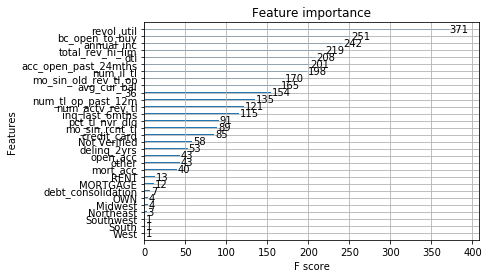

In [273]:
#Looking at plot of feature importance.
from xgboost import plot_importance

plot_importance(xg_clf)

In [274]:
#Getting Feature Importance for xg boost.
importance = xg_clf.feature_importances_

importalist = []
for x in importance:
    importalist.append(x)

xlist=[]
for x in X_trainClean:
    xlist.append(x)

columns = ['x', 'importance']

important = pd.DataFrame(columns=columns)

important['x'] = xlist
important['importance'] = importalist

important.sort_values(by=['importance'], ascending = False).head()

,x,importance
21,revol_util,0.119755
25,bc_open_to_buy,0.081020
16,annual_inc,0.078115
22,total_rev_hi_lim,0.070691
17,dti,0.067140


In [275]:
#Predictions for gradient boost and xgboost.
gpredict = grad_clf.predict(X_test)
xgpredict = xg_clf.predict(X_test)

C:\Users\AH\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [276]:
train_gb_score = grad_clf.score(X_trainClean, y_trainClean)
test_gb_score = grad_clf.score(X_test, y_test)
train_xgb_score = xg_clf.score(X_trainClean, y_trainClean)
test_xgb_score = xg_clf.score(X_test, y_test)

print("Accuracy score of Gradient Boosting classifier for training set")
print("{:2.4f}".format(train_gb_score))
print("Accuracy score of Gradient Boosting classifier for test set")
print("{:2.4f}".format(test_gb_score))

print("----------------------------------------------------------------")

print("Accuracy score of XGBoost classifier for training set")
print("{:2.4f}".format(train_xgb_score))
print("Accuracy score of XGBoost classifier for testset")
print("{:2.4f}".format(test_xgb_score))

C:\Users\AH\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy score of Gradient Boosting classifier for training set
0.8030
Accuracy score of Gradient Boosting classifier for test set
0.7772
----------------------------------------------------------------
Accuracy score of XGBoost classifier for training set
0.7809
Accuracy score of XGBoost classifier for testset
0.7756


C:\Users\AH\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Running Normal Logistic Regression

In [277]:
from sklearn.linear_model import LogisticRegression

In [278]:
logreg = LogisticRegression()
logreg.fit(X_trainClean, y_trainClean)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


# Confusion Matricies
Showing where and how often the predictions went wrong.

Concatenating results with the predictions could show the specific rows where things went wrong. This could be something to add into the presentation.

In [279]:
from sklearn.metrics import confusion_matrix

### Lasso

In [281]:
confusion_matrix(ytestpred, y_test, labels=[1, 0])

array([[26479,  9819],
       [12257, 40790]], dtype=int64)

### Gradient Boost and XGBoost

In [282]:
#Gradient Boost
print(confusion_matrix(gpredict, y_test, labels=[1,0]))

[[28212  9385]
 [10524 41224]]


In [283]:
#XGBoost
print(confusion_matrix(xgpredict, y_test, labels=[1,0]))

[[28016  9326]
 [10720 41283]]


<center><h1> Overview of looking at exactly where our model had troubles.</h1></center>

This section of the code is an ongoing work in progress.

In [286]:
#Reading in created grade original grade file.
LoanGrade = pd.read_csv(r"C:\Users\AH\MSAnalytics\Fall\DATA900\LendingClub\GradeLoans.csv")


print(LoanGrade.shape)
LoanGrade.head()


(446725, 4)


,grade,addr_state,issue_d,NewGrade
0,C,NV,Mar-2014,Other
1,B,WI,Mar-2014,AB
2,G,CA,Mar-2014,Other
3,B,VA,Mar-2014,AB
4,D,NJ,Mar-2014,Other


In [287]:
#Examining the distribution of original loan grades before grouping into AB/Other.
OvGrade = LoanGrade.groupby(['grade'])['NewGrade'].count().reset_index()

OvGrade.head()

,grade,NewGrade
0,A,60613
1,B,132573
2,C,141588
3,D,70498
4,E,28971


### Taking a further look into where XG Boost model went wrong in the test data since it performed the best.

In [288]:
#Creating dataframe of test data information, adding information to a version of the test set data by the index.
#Although this has been done after the test set data has already been pre-processed, making alot of the information useless.
#In the future we could do this to the date before it is scaled to gain more insights.

XGTrouble = X_test
XGTrouble['grade'] = pd.Series(LoanGrade['grade'], index = XGTrouble.index)
XGTrouble['addr_state'] = pd.Series(LoanGrade['addr_state'], index = XGTrouble.index)
XGTrouble['issue_d'] = pd.Series(LoanGrade['issue_d'], index = XGTrouble.index)
XGTrouble['predicted'] = pd.Series(xgpredict, index= XGTrouble.index)
XGTrouble['actual'] = y_test

In [289]:
#Showcasing the total number of each type of grade in the test set.
XGTrouble['grade'].value_counts()

C    28314
B    26538
D    13997
A    12198
E     5803
F     1965
G      530
Name: grade, dtype: int64

In [290]:
#Creating lists of various information for where row predicted grade does not equal the actual grade.

badindex = []
badgrade = []
badstate = []
badtime = []

for index, row in XGTrouble.iterrows():
    if row['actual'] != row['predicted']:
        badindex.append(index)
        badgrade.append(row['grade'])
        badstate.append(row['addr_state'])
        badtime.append(row['issue_d'])

In [291]:
#Creating a dataframe out of the above information.

badthings = pd.DataFrame()
#Index is the original index of the loan in our final dataframe.
badthings['index'] = badindex
#Column for original grade.
badthings['oggrade'] = badgrade
badthings['state'] = badstate
badthings['date'] = badtime

badthings.head()

,index,oggrade,state,date
0,60211,D,NH,Jun-2014
1,343402,C,UT,Oct-16
2,178429,C,FL,Sep-16
3,3764,C,PA,Mar-2014
4,376225,B,NV,Mar-17


In [292]:
#This cell provides a count of the number of loans for each letter grade which were predicted wrong as AB or other.
#This makes sense that most of the errors were for B/C grade loans as that is the boundary between our classes.
OvBad = badthings.groupby(['oggrade'])['state'].count().reset_index().sort_values(by=['state'], ascending = False)

OvBad

,oggrade,state
1,B,9943
2,C,7389
3,D,1637
0,A,777
4,E,261
5,F,36
6,G,3


In [293]:
#Merging total number of loans in our test set with the number of loans which were predicted wrong.
#This will allow us to calculate the percent of each loan grade which was predicted wrong.
TotalBad = pd.merge(OvGrade, OvBad, left_on='grade', right_on='oggrade')

TotalBad['percentwrong'] = (TotalBad['state']/TotalBad['NewGrade'])*100

TotalBad

,grade,NewGrade,oggrade,state,percentwrong
0,A,60613,A,777,1.281903
1,B,132573,B,9943,7.500019
2,C,141588,C,7389,5.218663
3,D,70498,D,1637,2.322052
4,E,28971,E,261,0.900901
5,F,9717,F,36,0.370485
6,G,2765,G,3,0.108499
